# Matplotlib
Credits:  
- Hannah Aizenman, Thomas Caswell, [Introduction to Matplotlib](https://www.youtube.com/watch?v=Tr4DYo4v5AY), [Github](https://github.com/story645/mpl_tutorial/tree/master/notebooks)

In [56]:
import matplotlib.pyplot as plt
print(f"matplotlib: {matplotlib.__version__}")
import pandas as pd
print(f"pandas: {pd.__version__}")
import numpy as np
print(f"numpy: {np.__version__}")

matplotlib: 3.1.1
pandas: 0.25.2
numpy: 1.19.4


In [57]:
# info about the funciton
ax.plot?

In [58]:
# change this to png if your plots are too small
%config InlineBackend.figure_format = 'retina' 

In [59]:
# make a Figure
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

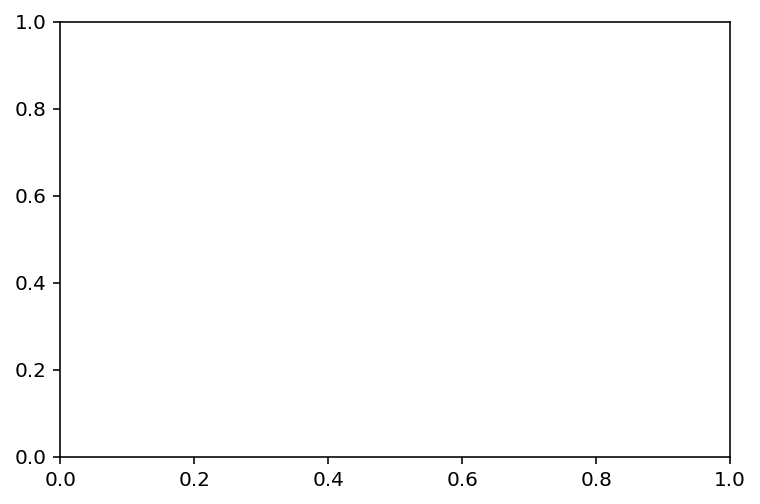

In [60]:
# make a Figure + Axes as fig, ax
fig, ax = plt.subplots()

In [61]:
# dataset
df = pd.read_csv("http://bit.ly/tcsv19")
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

## Line plot

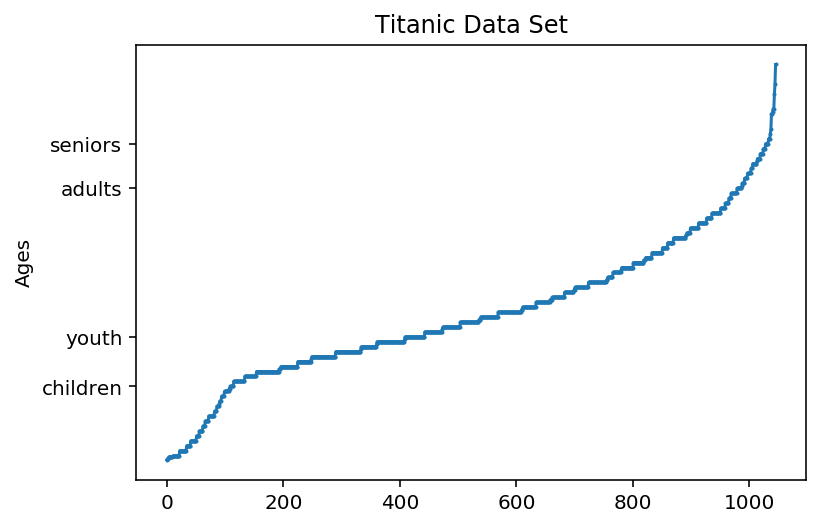

In [99]:
fig, ax = plt.subplots()
# the _ is used to suppress prints
_ = ax.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax.set_title("Titanic Data Set")
_ = ax.set_ylabel("Ages")
_ = ax.set_yticks([15,25, 55, 64])
_ = ax.set_yticklabels(['children', 'youth', 'adults', 'seniors'])

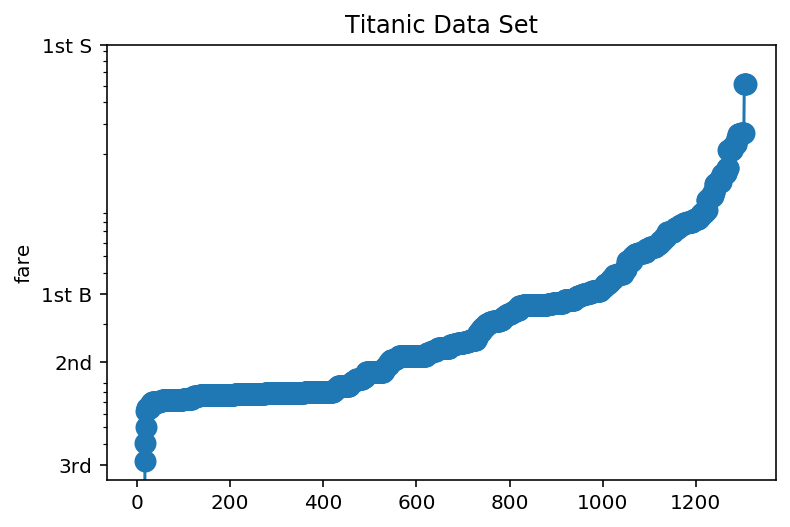

In [100]:
fig, ax = plt.subplots()
# the _ is used to suppress prints
_ = ax.plot(np.sort(df['fare']), marker='o', markersize=10)
_ = ax.set_title("Titanic Data Set")
_ = ax.set_ylabel("fare")
_ = ax.set_yscale('log') # convert what follows on the y to log
_ = ax.set_yticks([3, 12, 30, 870])
_ = ax.set_yticklabels(['3rd', '2nd', '1st B', '1st S'])

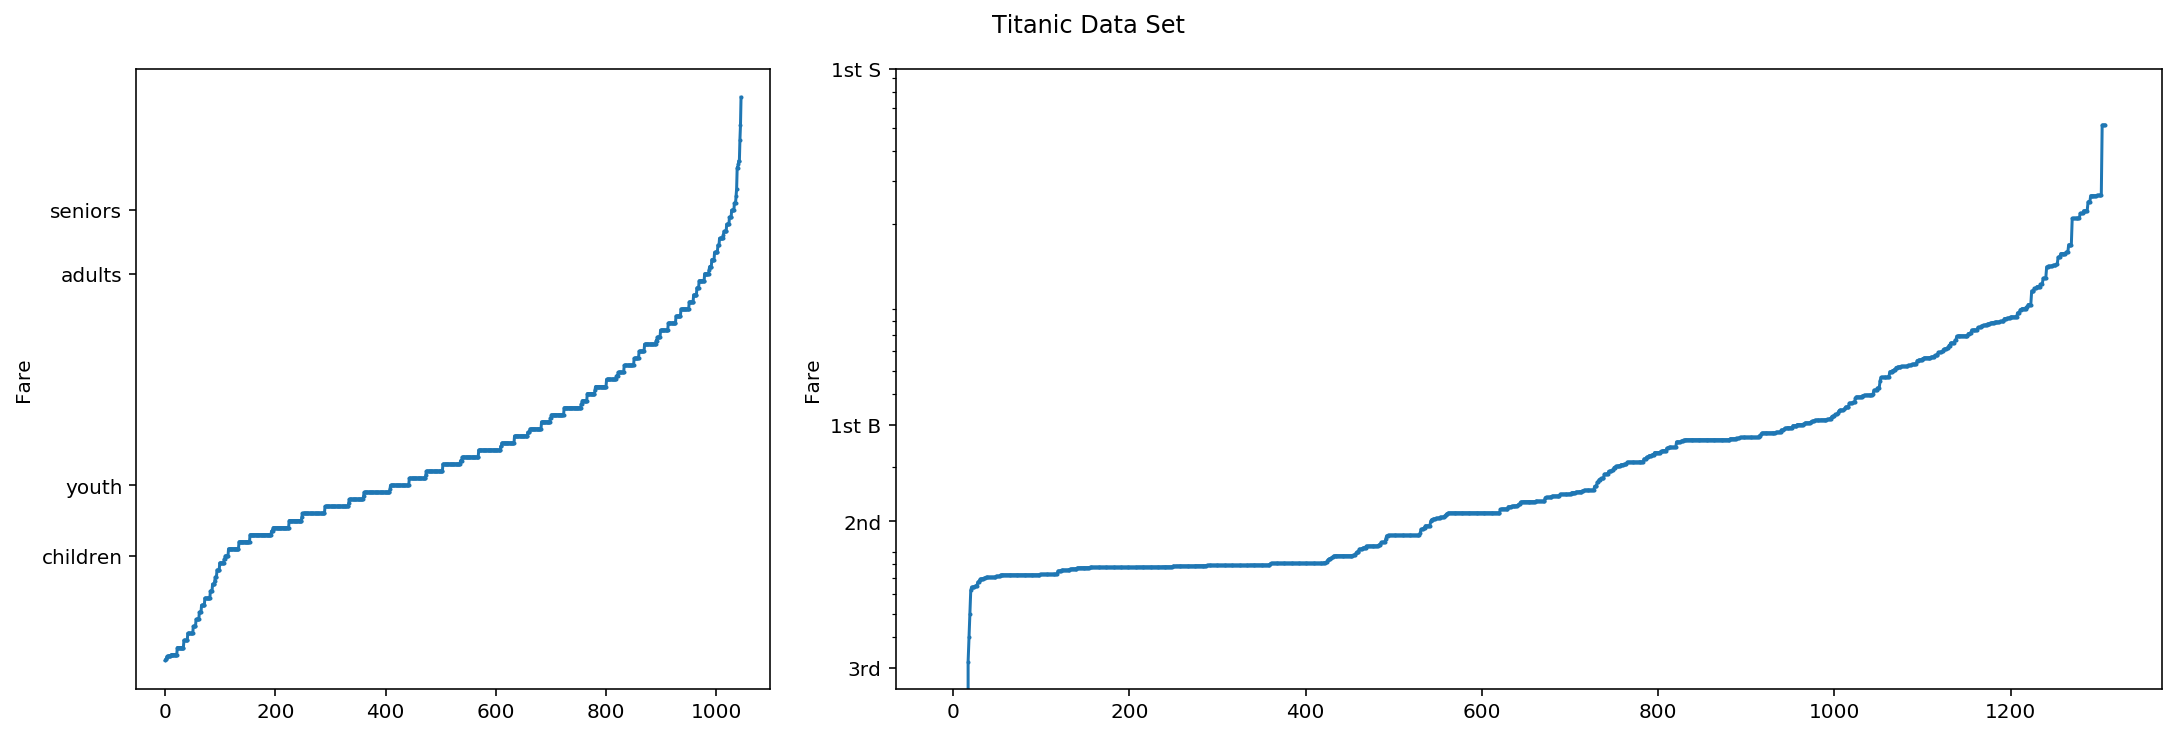

In [101]:
# mutiples axes, gridspec_kw, constrained_layout
fig, ax = plt.subplots(ncols=2, nrows=1,
                       gridspec_kw={'width_ratios':[1,2]},
                       constrained_layout=True,
                       figsize=(15,5))
# ax - is a tuple containing two axes (ax[0], ax[1])
# gridspec_kw - is a key word for setting width ratios of the axes
# constrained_layout - for axes to be spaced properly
# figsize - size of the figure (width, height)

fig.suptitle('Next to (1x2)')
_ = fig.suptitle("Titanic Data Set")

_ = ax[0].plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax[0].set_ylabel("Ages")
_ = ax[0].set_yticks([15,25, 55, 64])
_ = ax[0].set_ylabel('Fare')
_ = ax[0].set_yticklabels(['children', 'youth', 'adults', 'seniors'])

_ = ax[1].plot(np.sort(df['fare']), marker='o', markersize=1)
_ = ax[1].set_ylabel("fare")
_ = ax[1].set_yscale('log') 
_ = ax[1].set_yticks([3, 12, 30, 870])
_ = ax[1].set_ylabel('Fare')
_ = ax[1].set_yticklabels(['3rd', '2nd', '1st B', '1st S'])

## Scatter plot

In [ ]:
fig, ax = plt.subplots()

# Label all the things using set
_ = ax.set(xlabel='age',ylabel='fare',title='Titanic Passengers')

if 0:
    # Simplify code using the data kwarg
    _ = ax.scatter('age', 'fare', data=df)

elif 0:
    # Let's encode data using color
    _ = ax.scatter('age', 'fare', c='survived', data=df)

elif 0:
    # Lets customize those colors
    _ = ax.scatter('age', 'fare', c='survived', cmap='tab10', data=df)

elif 0:
    # Create a ListedColormap so we can set the colors manually
    import matplotlib.colors as mcolors
    cmap = mcolors.ListedColormap(['black', 'yellowgreen'])
    _ = ax.scatter('age', 'fare', c='survived', cmap=cmap, data=df)

elif 0:
    # Let's add a legend
    sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, data=df)
    _ =  ax.legend(*sc.legend_elements())

elif 0:
    # Lets add custom legend labels
    _ =  ax.legend(handles = sc.legend_elements()[0], 
                   labels=['Died', 'Survived'])

elif 0:
    # Let's clean up a bit because large dataset
    sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, 
                    alpha=.5, edgecolor='black', data=df)
    _ =  ax.legend(handles = sc.legend_elements()[0], 
                   labels=['Died', 'Survived'])
elif 0:
    # Encode even more information: Bubble Chart
    sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, alpha=.5, 
                    edgecolor='black', s = df['pclass']*25, data=df)
    _ = ax.set(xlabel = 'Age', ylabel = 'Fare')
    _ = ax.legend(handles = sc.legend_elements()[0], 
                  labels=['Died', 'Survived'])
else:
    # Visual Overload: markers
    sc = ax.scatter('age', 'fare', c='survived', cmap=cmap, alpha=.5, edgecolor='black', 
                    marker='s',label='Female', data=df[df['sex'].str.match('female')])
    sc2 = ax.scatter('age', 'fare', c='survived', cmap=cmap, alpha=.5, edgecolor='black', 
                    marker='^',label='male', data=df[df['sex'].str.match('male')])
    _ =  ax.legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])

## Histogram

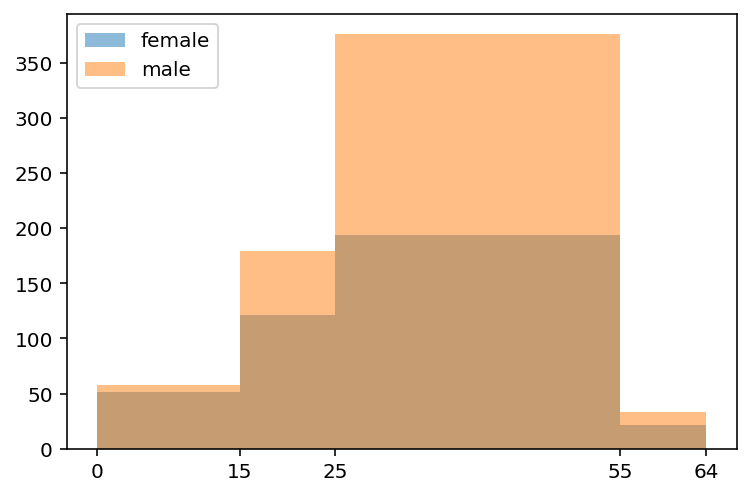

In [162]:
fig, ax = plt.subplots()

if 0:
    # Let's make Histograms
    (counts, edges, _) = ax.hist('age', bins='auto', data=df,
                                 edgecolor='k', facecolor='b',
                                 hatch='//')

elif 0:
    # Custom Bins to match our CDF
    (counts,edges,_) = ax.hist('age',bins=[0,15,25,55,64],data=df,
                               edgecolor='k', facecolor='orange',
                               hatch='//')
    _ = ax.set_xticks([0,15,25,55,64])
    
elif 1:
    #Use groupby to simplify code
    # only consider rows where we know the age
    for label, gdf in df.groupby('sex'):
        ax.hist('age', bins=[0, 15,25, 55, 64], data=gdf, 
                label=label, alpha=.5)
    _ = ax.set_xticks([0, 15,25, 55, 64])
    _ = ax.legend()

## Pie chart

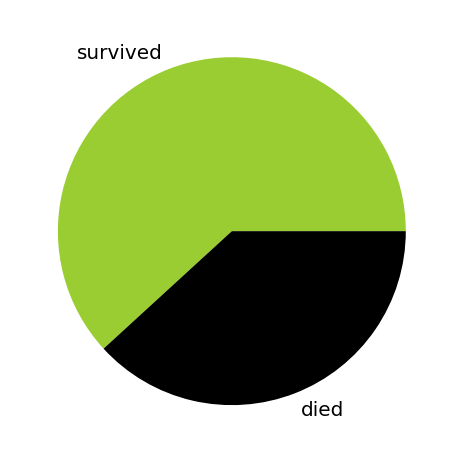

In [165]:
fig, ax =plt.subplots()
survived = df['survived'].value_counts()

if 1:
    # Let's make a Pie chart
    _ = ax.pie(x=survived.values, 
       labels=['survived', 'died'], 
               colors=['yellowgreen', 'black'])

## Bar chart

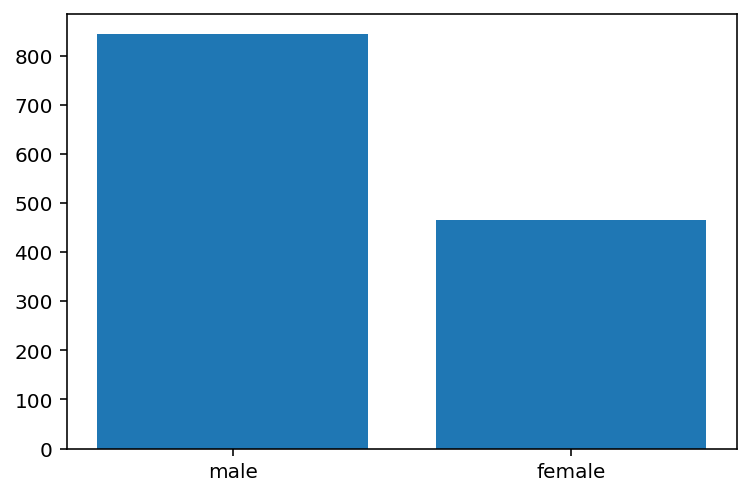

In [166]:
fig, ax =plt.subplots()
pclass = df['sex'].value_counts()

if 1:
    # Let's make a Bar charts
    _ = ax.bar(pclass.index, pclass.values)

## Images

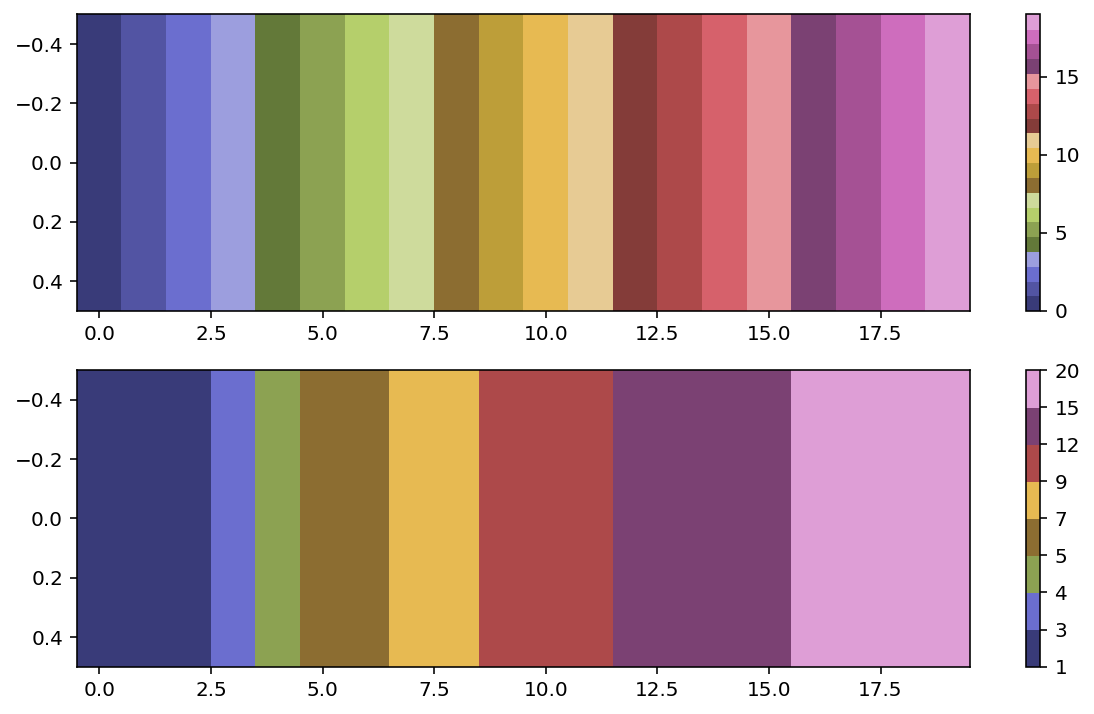

In [186]:
if 0:
    # loading an image and showing
    im = np.load('images/dem.npy')
    print(f"type: {type(im)}, shape:{im.shape}, dtype:{im.dtype}")
    plt.imshow(im)

elif 0:
    #include a color bar to go with the image
    fig, ax = plt.subplots()
    img = ax.imshow(im)
    cbar = fig.colorbar(img)
    cbar.set_label('elevation')
    
elif 0:
    # To set the lower limit, use the vmin parameter to imshow
    fig, ax = plt.subplots()
    img = ax.imshow(im, vmin=700)
    cbar = fig.colorbar(img)
    cbar.set_label('elevation')
    
elif 0:
    # e.g. magma colormap
    fig, ax = plt.subplots()
    img = ax.imshow(im, cmap='magma')
    cbar = fig.colorbar(img)
    cbar.set_label('elevation')
    
elif 0:
    # Follow the lines (note the use of sharex, sharey)
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
    ax1.contour(im, cmap='magma')
    ax1.set_aspect('equal')
    ax2.imshow(im, cmap='magma', origin='lower')      
    # put (0, 0) on the lower left to match contour
    
elif 0:
    # Change the normalization (The default normalization is
    # linear, however there are cases where you need a more 
    # exotic normalization)
    from matplotlib.colors import LogNorm

    # take the 2D fft of our test image and re-order to put 0 
    # frequency in the center
    spike = np.abs(np.fft.fftshift(np.fft.fft2(im)))

    fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(10, 5))

    lin_im = ax1.imshow(spike)
    _ = fig.colorbar(lin_im, ax=ax1)
    _ = ax1.set_title('linear color scale')

    log_im = ax2.imshow(spike, norm=LogNorm())
    _ = fig.colorbar(log_im, ax=ax2)
    _ = ax2.set_title('log color scale')
    
else:
    # We can make use of a BoundryNorm to quantize the data 
    # (in in possibly non-uniform bins)
    import matplotlib.colors as mcolors
    import matplotlib.cm as mcm

    cmap = mcm.tab20b
    norm = mcolors.BoundaryNorm([1, 3, 4, 5, 7, 9, 12, 15, 20], cmap.N)

    data = np.arange(20).reshape((1, 20))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

    top = ax1.imshow(data, cmap=cmap, aspect='auto')
    fig.colorbar(top, ax=ax1)
    bottom = ax2.imshow(data, norm=norm, cmap=cmap, aspect='auto')
    fig.colorbar(bottom, ax=ax2)